# Comparing Top Meme Cryptos Using Yfinance

The purpose of this notebook is to explore the use of Yfinance for crypto analysis by comparing top meme cryptos (DOGE-related) with market caps over 100m. To date, there are currently seven (7) Doge-meme cryptos (DMCs) with a market cap over 100m USD:

- Dogecoin - DOGE
- SHIBA INU - SHIB
- Dogelon Mars - ELON
- Samoyedcoin - SAMO
- Hoge Finance - HOGE
- Doge Dash - DOGEDASH

The initial analysis will focus on the two largest coins - DOGE and SHIB - because the first limitation of Yfinance is limited coverage of currencies.  

Yfinance is good for quick gathering of long-term historical prices.  However, Yfinance is not supported by Yahoo and it is not clear if/when they will limit data scrapes of this kind in the future.

A subsequent notebook will compare various APIs for crypto data.

In [1]:
import pandas as pd
import datetime as dt
from pandas_datareader import data
import yfinance as yf

### Gather information on a single ticker

In [2]:
doge=yf.Ticker("DOGE-USD")

In [3]:
doge.info['volume']

1840250112

Information can be gathered for more currencies one at a time and assembled into a single dataframe for analysis.  The individual tables are then combined for analysis.  

In [4]:
doge=yf.download(
tickers = ['DOGE-USD'],
period = '6mo')

[*********************100%***********************]  1 of 1 completed


In [5]:
doge.reset_index(inplace=True)
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-23,0.342522,0.350863,0.249437,0.308071,0.308071,7143545371
1,2021-05-24,0.306715,0.371485,0.296291,0.366162,0.366162,6821088755
2,2021-05-25,0.366041,0.380010,0.323497,0.346302,0.346302,5544552739
3,2021-05-26,0.346396,0.365920,0.338857,0.353693,0.353693,3355793260
4,2021-05-27,0.353463,0.353463,0.328144,0.332945,0.332945,2485942309
...,...,...,...,...,...,...,...
180,2021-11-19,0.220995,0.236832,0.216518,0.233110,0.233110,1296123511
181,2021-11-20,0.233174,0.235953,0.225451,0.233024,0.233024,805305660
182,2021-11-21,0.233255,0.233350,0.225680,0.226328,0.226328,751789838
183,2021-11-22,0.226160,0.227531,0.216898,0.219676,0.219676,921753721


In [6]:
shib=yf.download(
tickers = ['SHIB-USD'],
period = '6mo')
shib.reset_index(inplace=True)
shib.head(2)

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-23,0.000008,0.000010,0.000007,0.000008,0.000008,1585032040
1,2021-05-24,0.000008,0.000012,0.000008,0.000011,0.000011,2179651359


In [7]:
df=pd.DataFrame({'DOGE': doge['Close'], 'SHIB': shib['Close']})

In [8]:
df.head(2)

,DOGE,SHIB
0,0.308071,0.000008
1,0.366162,0.000011


In [9]:
df.describe()

,DOGE,SHIB
count,185.000000,185.000000
mean,0.257770,0.000017
std,0.048575,0.000018
min,0.170801,0.000006
25%,0.224126,0.000007
50%,0.251733,0.000008
75%,0.288739,0.000026
max,0.423374,0.000080


### Gather Information on Multiple Tickers

This method also allows for multiple currencies, but a bit of wrangling is needed for the final table

In [47]:
df=yf.download(
tickers = ['DOGE-USD', 'SHIB-USD'],
period = '6mo')

[*********************100%***********************]  2 of 2 completed


In [97]:
df.head(3)

,Adj Close-DOGE-USD,Adj Close-SHIB-USD,Close-DOGE-USD,Close-SHIB-USD,High-DOGE-USD,High-SHIB-USD,Low-DOGE-USD,Low-SHIB-USD,Open-DOGE-USD,Open-SHIB-USD,Volume-DOGE-USD,Volume-SHIB-USD
Date,,,,,,,,,,,,
2021-05-23,0.308071,0.000008,0.308071,0.000008,0.350863,0.000010,0.249437,0.000007,0.342522,0.000008,7143545371,1585032040
2021-05-24,0.366162,0.000011,0.366162,0.000011,0.371485,0.000012,0.296291,0.000008,0.306715,0.000008,6821088755,2179651359
2021-05-25,0.346302,0.000009,0.346302,0.000009,0.380010,0.000011,0.323497,0.000009,0.366041,0.000011,5544552739,1415340765


In [49]:
my_list=df.columns.values.tolist()

In [50]:
my_list

[('Adj Close', 'DOGE-USD'),
 ('Adj Close', 'SHIB-USD'),
 ('Close', 'DOGE-USD'),
 ('Close', 'SHIB-USD'),
 ('High', 'DOGE-USD'),
 ('High', 'SHIB-USD'),
 ('Low', 'DOGE-USD'),
 ('Low', 'SHIB-USD'),
 ('Open', 'DOGE-USD'),
 ('Open', 'SHIB-USD'),
 ('Volume', 'DOGE-USD'),
 ('Volume', 'SHIB-USD')]

In [51]:
df.columns=df.columns.map('-'.join).str.strip('-')

In [15]:
#In case you would like to reset index...some times it is cleaner
#df.reset_index(drop=False, inplace=True)

In [96]:
df.head(3)

,Adj Close-DOGE-USD,Adj Close-SHIB-USD,Close-DOGE-USD,Close-SHIB-USD,High-DOGE-USD,High-SHIB-USD,Low-DOGE-USD,Low-SHIB-USD,Open-DOGE-USD,Open-SHIB-USD,Volume-DOGE-USD,Volume-SHIB-USD
Date,,,,,,,,,,,,
2021-05-23,0.308071,0.000008,0.308071,0.000008,0.350863,0.000010,0.249437,0.000007,0.342522,0.000008,7143545371,1585032040
2021-05-24,0.366162,0.000011,0.366162,0.000011,0.371485,0.000012,0.296291,0.000008,0.306715,0.000008,6821088755,2179651359
2021-05-25,0.346302,0.000009,0.346302,0.000009,0.380010,0.000011,0.323497,0.000009,0.366041,0.000011,5544552739,1415340765


### Visualize Several Metrics on Closing Price

In [57]:
df1=df[['Close-DOGE-USD', 'Close-SHIB-USD']]

In [95]:
df1.head(2)

,Close-DOGE-USD,Close-SHIB-USD
Date,,
2021-05-23,0.308071,0.000008
2021-05-24,0.366162,0.000011


In [98]:
df1.describe()

,Close-DOGE-USD,Close-SHIB-USD
count,185.000000,185.000000
mean,0.257767,0.000017
std,0.048577,0.000018
min,0.170801,0.000006
25%,0.224126,0.000007
50%,0.251733,0.000008
75%,0.288739,0.000026
max,0.423374,0.000080


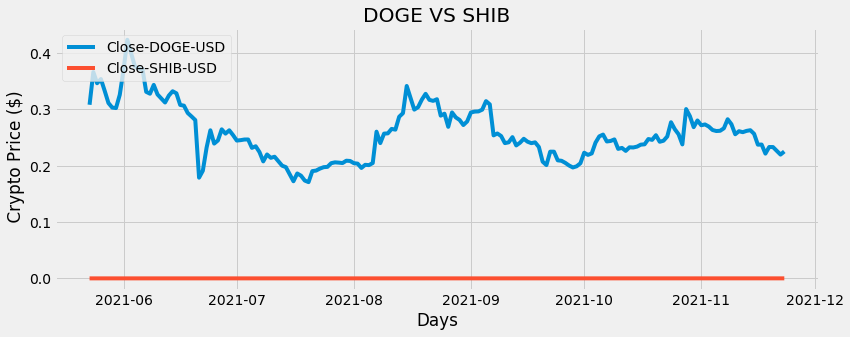

In [60]:
#Using fivethirtyeight style
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
my_crypto = df1
plt.figure(figsize = (12.2, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label = c)
plt.title('DOGE VS SHIB')
plt.xlabel('Days')
plt.ylabel(' Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')
plt.show()

In [61]:
#Scale the data
#the min-max scaler method scales the dataset so that all the input features lie between 0 and 100 inclusive
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(df1)
scaled

array([[ 54.34863961,   2.70270247],
       [ 77.34833276,   6.75675679],
       [ 69.4852597 ,   4.05405432],
       [ 72.41154469,   5.40540494],
       [ 64.19688226,   4.05405432],
       [ 55.58947384,   2.70270247],
       [ 52.38446132,   2.70270247],
       [ 52.03367432,   2.70270247],
       [ 61.37195487,   4.05405432],
       [ 78.8983844 ,   4.05405432],
       [100.        ,   4.05405432],
       [ 90.73099425,   5.40540494],
       [ 81.37133304,   4.05405432],
       [ 79.72982357,   2.70270247],
       [ 79.58333292,   4.05405432],
       [ 63.44661177,   2.70270247],
       [ 62.11511027,   1.35135124],
       [ 68.30896867,   1.35135124],
       [ 61.58615099,   1.35135124],
       [ 58.81784935,   0.        ],
       [ 55.93748796,   0.        ],
       [ 60.80658237,   1.35135124],
       [ 63.85639621,   1.35135124],
       [ 62.38988496,   1.35135124],
       [ 54.22591313,   2.70270247],
       [ 53.72506023,   2.70270247],
       [ 48.56853028,   1.35135124],
 

In [62]:
df1_scale = pd.DataFrame(scaled, columns = df1.columns)

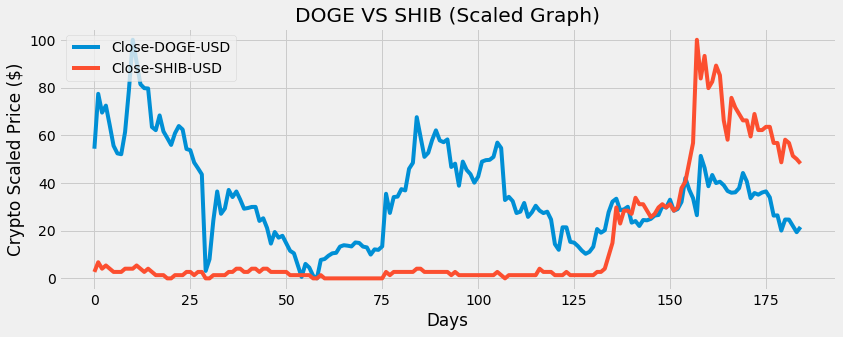

In [63]:
#Visualize the scaled data
my_crypto = df1_scale
plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values:
   plt.plot(my_crypto[c], label=c)
plt.title('DOGE VS SHIB (Scaled Graph)')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()

In [64]:
DSR = df1.pct_change(1)
DSR

,Close-DOGE-USD,Close-SHIB-USD
Date,,
2021-05-23,NaN,NaN
2021-05-24,0.188564,0.375000
2021-05-25,-0.054238,-0.181818
2021-05-26,0.021343,0.111111
2021-05-27,-0.058661,-0.100000
...,...,...
2021-11-19,0.052972,0.166667
2021-11-20,-0.000369,-0.020408
2021-11-21,-0.028735,-0.083333


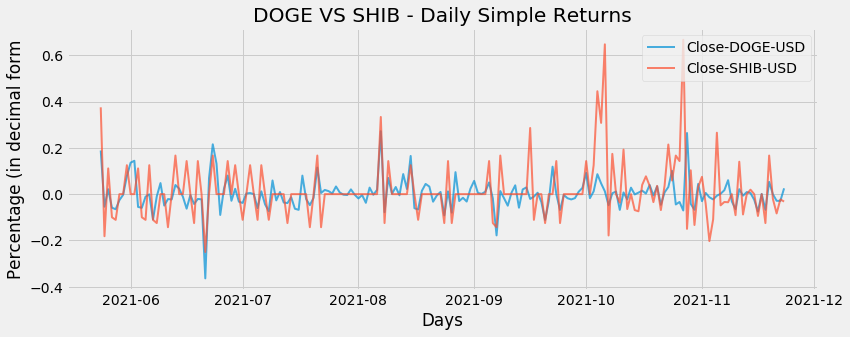

In [65]:
plt.figure(figsize=(12, 4.5))
for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('DOGE VS SHIB - Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [66]:
print('The cryptocurrency volatility:')
DSR.std()

The cryptocurrency volatility:


Close-DOGE-USD    0.066141
Close-SHIB-USD    0.123756
dtype: float64

In [67]:
DSR.mean()

Close-DOGE-USD    0.000505
Close-SHIB-USD    0.015684
dtype: float64

In [68]:
DSR.corr()

,Close-DOGE-USD,Close-SHIB-USD
Close-DOGE-USD,1.000000,0.388005
Close-SHIB-USD,0.388005,1.000000


### Heatmap

A heatmap can be used to explore correlations among three or more currencies.

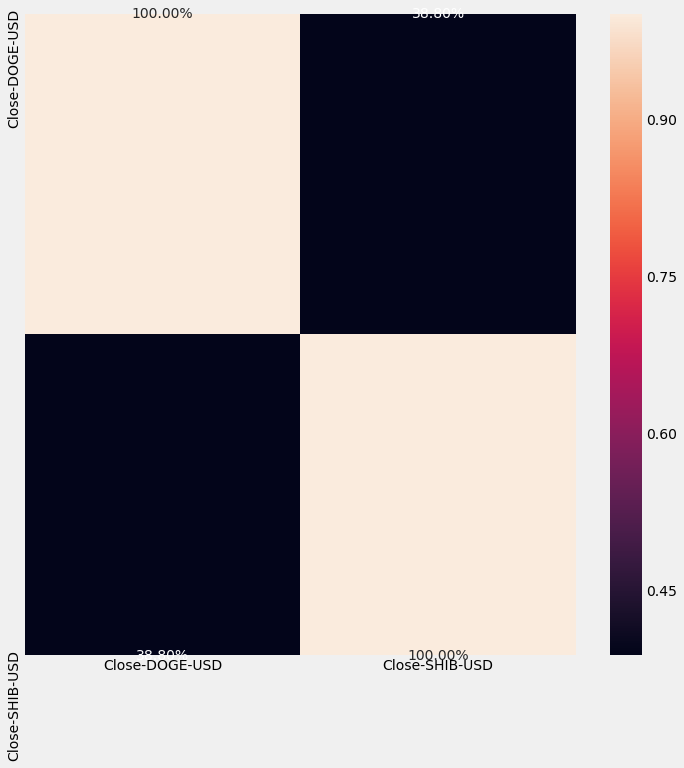

In [69]:
import seaborn as sns
plt.subplots(figsize= (11,11))
sns.heatmap(DSR.corr(), annot= True, fmt= '.2%')

### Calculating Daily Cumulative Simple Return

From a more traditional perspective.

In [70]:
DCSR = (DSR+1).cumprod()
DCSR

,Close-DOGE-USD,Close-SHIB-USD
Date,,
2021-05-23,NaN,NaN
2021-05-24,1.188564,1.375000
2021-05-25,1.124098,1.125000
2021-05-26,1.148089,1.250000
2021-05-27,1.080741,1.125000
...,...,...
2021-11-19,0.756676,6.125000
2021-11-20,0.756397,6.000000
2021-11-21,0.734662,5.500000


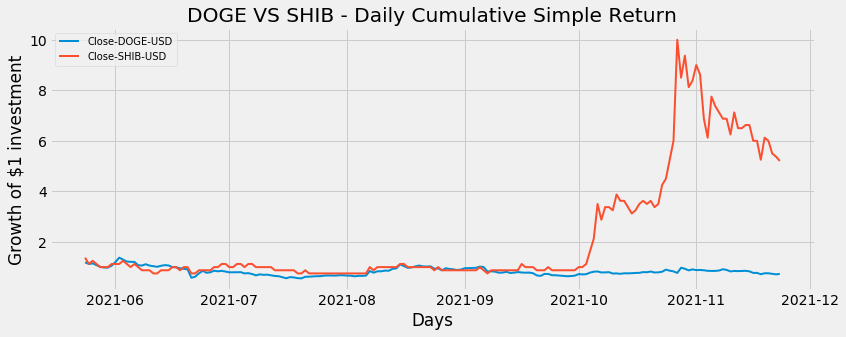

In [71]:
plt.figure(figsize=(12.2, 4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c], lw=2, label= c)
plt.title('DOGE VS SHIB - Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()

### Calculating Moving Mean

In [72]:
#Let's recall our dataframe
df.head(3)

,Adj Close-DOGE-USD,Adj Close-SHIB-USD,Close-DOGE-USD,Close-SHIB-USD,High-DOGE-USD,High-SHIB-USD,Low-DOGE-USD,Low-SHIB-USD,Open-DOGE-USD,Open-SHIB-USD,Volume-DOGE-USD,Volume-SHIB-USD
Date,,,,,,,,,,,,
2021-05-23,0.308071,0.000008,0.308071,0.000008,0.350863,0.000010,0.249437,0.000007,0.342522,0.000008,7143545371,1585032040
2021-05-24,0.366162,0.000011,0.366162,0.000011,0.371485,0.000012,0.296291,0.000008,0.306715,0.000008,6821088755,2179651359
2021-05-25,0.346302,0.000009,0.346302,0.000009,0.380010,0.000011,0.323497,0.000009,0.366041,0.000011,5544552739,1415340765


In [73]:
#Select only the closing price for DOGE
dogeprice=df[['Close-DOGE-USD']].copy()
dogeprice.head()

,Close-DOGE-USD
Date,
2021-05-23,0.308071
2021-05-24,0.366162
2021-05-25,0.346302
2021-05-26,0.353693
2021-05-27,0.332945


In [74]:
#A little bit of cleaning
dogeprice.columns=['Price']
dogeprice.head()

,Price
Date,
2021-05-23,0.308071
2021-05-24,0.366162
2021-05-25,0.346302
2021-05-26,0.353693
2021-05-27,0.332945


In [75]:
#Calculate moving mean
dogeprice['Moving Mean']=dogeprice['Price'].rolling(90).mean()
dogeprice[90:95]

,Price,Moving Mean
Date,,
2021-08-21,0.316797,0.263766
2021-08-22,0.314963,0.263197
2021-08-23,0.317914,0.262881
2021-08-24,0.288739,0.262160
2021-08-25,0.292226,0.261707


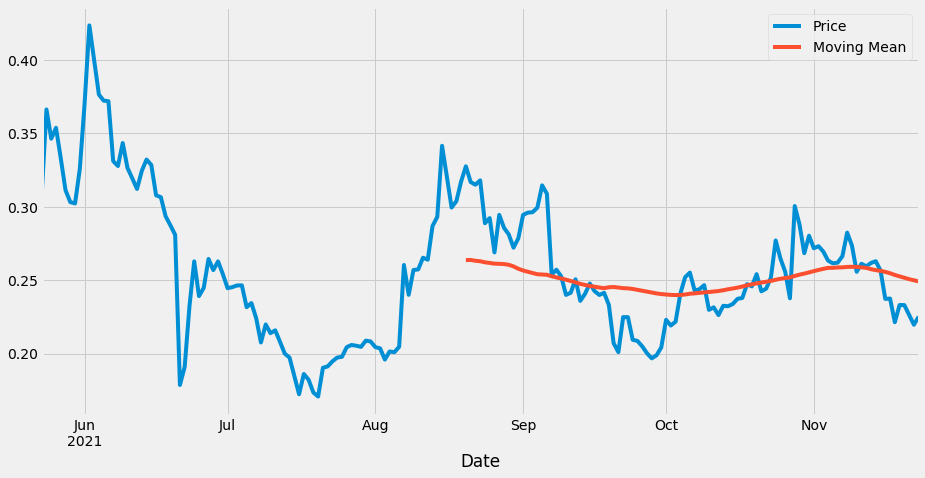

In [76]:
#Visualize with matplotlib
dogeprice.plot(figsize=(14,7))

### Bollinger Bands

Some times it is useful to characterize volatility using Bollinger bands, which can be interpreted to indicate momentum.  Here they are calculated as two standard deviations above and below the moving average.

In [78]:
dogeprice['Moving Std']=dogeprice['Price'].rolling(90).std()

In [84]:
dogeprice['Upper Band'] = dogeprice['Price'] + (2*dogeprice['Moving Std'])
dogeprice['Lower Band'] = dogeprice['Price'] - (2*dogeprice['Moving Std'])

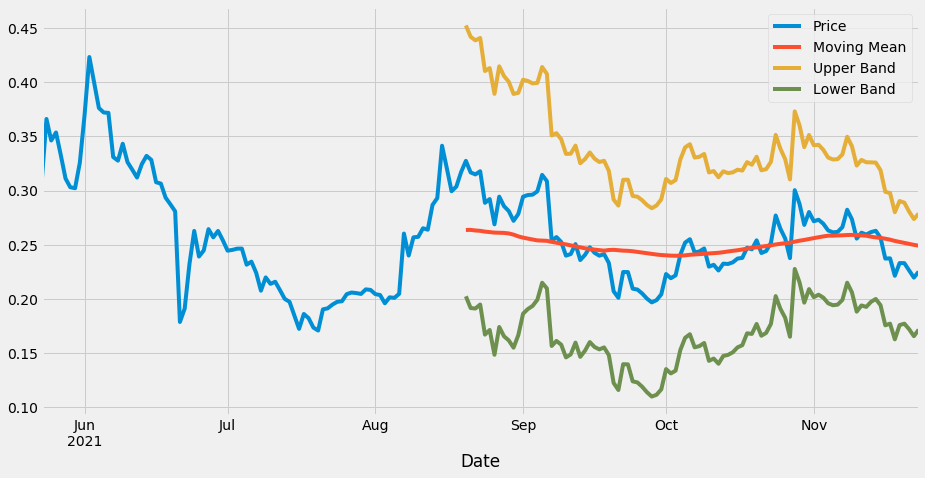

In [85]:
dogeprice[['Price', 'Moving Mean', 'Upper Band', 'Lower Band']].plot(figsize=(14, 7))

### Price and Volume

Some times it is useful to compare volume and price for a currency.

In [88]:
dogeprice.head(3)

,Price,Moving Mean,Moving Std,Upper Band,Lower Band
Date,,,,,
2021-05-23,0.308071,NaN,NaN,NaN,NaN
2021-05-24,0.366162,NaN,NaN,NaN,NaN
2021-05-25,0.346302,NaN,NaN,NaN,NaN


In [89]:
dogeprice['Volume'] = df['Volume-DOGE-USD']

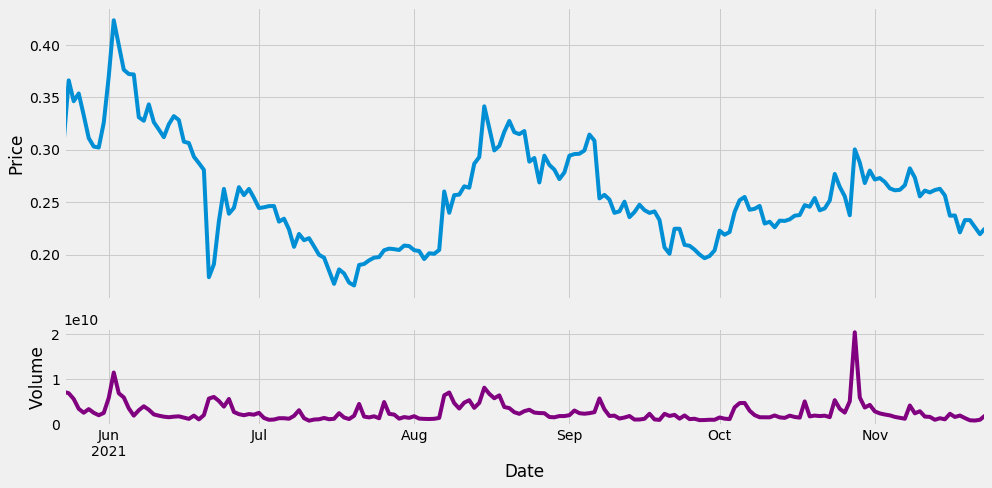

In [90]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(14, 7), gridspec_kw = {'height_ratios':[3, 1]})
dogeprice['Price'].plot(ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

dogeprice['Volume'].plot(ax=ax2, color='purple')
ax2.set_ylabel('Volume')

fig.tight_layout()